<h1>Walmart Stores Analysis

<i>Head to the bottom of the page for <b>Key Takeaways</b> of this project

In [1]:
# importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
df = pd.read_csv('./Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<h1> Figuring out the Top stores of Walmart 

In [4]:
# df_store_rank = df.groupby('Store')['Weekly_Sales'].sum()
df_store_rank = df.groupby('Store')['Weekly_Sales'].agg(['sum','count'])
df_store_rank=df_store_rank.sort_values('sum',ascending=False)
df_store_rank




,sum,count
Store,,
20,3.013978e+08,143
4,2.995440e+08,143
14,2.889999e+08,143
13,2.865177e+08,143
2,2.753824e+08,143
10,2.716177e+08,143
27,2.538559e+08,143
6,2.237561e+08,143
1,2.224028e+08,143


In [49]:
# retrieving the top and bottom performing stores based on sales 
stores_id_rank = df_store_rank.index
top_stores_id = stores_id_rank[:3]
bottom_stores_id = stores_id_rank[-3:]

<p>WE can say that the top stores are Store number 20,4 and 14 and bottom stores are 5,44,33 
on the basis if weekly sales  

In [50]:

# creating separate dataframes consisting of store data based on store id  

# selecting rows based on condition
top_stores_list = df[df['Store'].isin(top_stores_id)]
bottom_stores_list = df[df['Store'].isin(bottom_stores_id)]

<h3> Visualise Top and Bottom Performing Stores

In [74]:
# code to visualise the top and bottom perfroming stores 

top_stores_list['Weekly_Sales_inLakhs'] = top_stores_list['Weekly_Sales'].apply(lambda x : x/100000)
bottom_stores_list['Weekly_Sales_inLakhs'] = bottom_stores_list['Weekly_Sales'].apply(lambda x : x/100000)

# adding the sales of top  performing stores and grouping them by Store id 
top_stores_total_sales = top_stores_list.groupby('Store')['Weekly_Sales_inLakhs'].agg(['sum','count'])

# renaming columns and creating a store_id column 
top_stores_total_sales['Store id'] = top_stores_total_sales.index 
top_stores_total_sales.rename(columns = {'sum':'Total_Sales(in Lakhs)'}, inplace = True)
top_stores_total_sales


# adding the sales of bottom  performing stores and grouping them by Store id 
bottom_stores_total_sales = bottom_stores_list.groupby('Store')['Weekly_Sales_inLakhs'].agg(['sum','count'])

# renaming columns and creating a store_id column 
bottom_stores_total_sales['Store id'] = bottom_stores_total_sales.index 
bottom_stores_total_sales.rename(columns = {'sum':'Total_Sales(in Lakhs)'}, inplace = True)
bottom_stores_total_sales

C:\Users\lenovo\AppData\Local\Temp/ipykernel_18948/358100691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stores_list['Weekly_Sales_inLakhs'] = top_stores_list['Weekly_Sales'].apply(lambda x : x/100000)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_18948/358100691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_stores_list['Weekly_Sales_inLakhs'] = bottom_stores_list['Weekly_Sales'].apply(lambda x : x/100000)


,Total_Sales(in Lakhs),count,Store id
Store,,,
5,454.756889,143,5
33,371.602220,143,33
44,432.930878,143,44


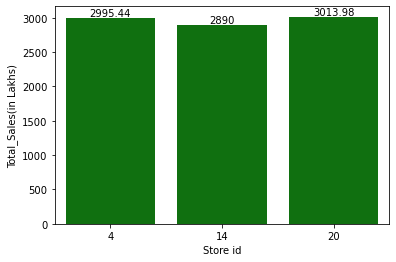

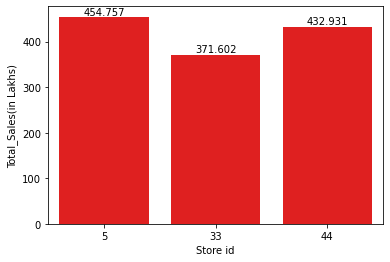

In [86]:
import seaborn as sns
plt.figure(figsize=(6,4))
plot_top = sns.barplot(x = 'Store id',
            y = 'Total_Sales(in Lakhs)',
            color='green',
            data = top_stores_total_sales)
 

plot_top .bar_label(plot_top .containers[0])
plt.show()



plot_bottom = sns.barplot(x = 'Store id',
            y = 'Total_Sales(in Lakhs)',
            color='r',
            data = bottom_stores_total_sales)
 

plot_bottom.bar_label(plot_bottom.containers[0])


# Show the plot
plt.show()


<h2>Temperature Difference Between the high and low selling stores 


In [8]:
bottom_avg_temp=bottom_stores_list['Temperature'].mean()
top_avg_temp=top_stores_list['Temperature'].mean()
percentage = ((bottom_avg_temp-top_avg_temp)/top_avg_temp) * 100
print(f"Top selling store average tempertaure is {top_avg_temp}")
print(f"Bottom selling store average tempertaure is {bottom_avg_temp}")
print("Percentage Increase in Tempertaure = ",round(percentage,1),'%')





Top selling store average tempertaure is 58.49857808857808
Bottom selling store average tempertaure is 66.61181818181817
Percentage Increase in Tempertaure =  13.9 %


<p>Top selling store average tempertaure = 58.49<br>
Bottom selling store average tempertaure =  66.61<br>
Percentage Increase  =  <b>13.9 %</b>

One of the reasons for more Weekly sales could be the ideal temperature at the stores locations 
This is one of the factors that can be considered when setting up Walmart stores in the near future

<h1>Fuel Price Difference Between the Top and Bottom Stores 
Allan no significant diff 

In [9]:
bottom_avg_fuel=bottom_stores_list['Fuel_Price'].mean()
top_avg_fuel=top_stores_list['Fuel_Price'].mean()
percentage = ((bottom_avg_temp-top_avg_fuel)/top_avg_fuel) * 100
print(f"Top selling store average Fuel Price  is {top_avg_fuel}")
print(f"Bottom selling store average Fuel Price  is {bottom_avg_fuel}")
print("There is no significant difference between the fuel prices ")

Top selling store average Fuel Price  is 3.3507296037296035
Bottom selling store average Fuel Price  is 3.360589743589741
Percentage Increase in Fuel Price  =  1888.0 %


In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<h2> Association betwwen Fuel price and Weekly sales 

On considering the Weekly sales against the Fuel prices around the locality. We understood at higher the fuel price more is the weekly sales.

In [12]:
# getting basic stats 
stats = df['Fuel_Price'].describe()
min = stats[3]
max = stats[7]
q1=stats[4]
q3=stats[6]


In [13]:
# dataframe containing fuel price between the lowest and first quartile price range 
min_fuel_data = df[df['Fuel_Price']<=q1]
avg_sales_fuel_min=min_fuel_data['Weekly_Sales'].mean()


# dataframe containing fuel price between the lowest and first quartile price range 
max_fuel_data = df[(df['Fuel_Price']>=q3) & (df['Fuel_Price']<=max)]
avg_sales_fuel_max=max_fuel_data['Weekly_Sales'].mean()



print(f'weekly sales of min is {avg_sales_fuel_min}')
print(f'weekly sales of max is {avg_sales_fuel_max}')

weekly sales of min is 1038218.5893672444
weekly sales of max is 1047184.0869021061


One of the reasons for such cases can be that the vicinity where the fuel prices are higher have better incomes as compared to people where fuel prices are less
<b>Verifying the mentioned  hypothesis 

In [14]:

avg_Unemployment_rate_min = min_fuel_data['Unemployment'].median()
avg_Unemployment_rate_max= max_fuel_data['Unemployment'].median()

print(f"unemployemnt rate is {avg_Unemployment_rate_min}")
print(f"unemployemnt rate is {avg_Unemployment_rate_max}")

unemployment_percent_increase =((avg_Unemployment_rate_min - avg_Unemployment_rate_max)/avg_Unemployment_rate_max)*100
print('Increase in Unemployemnt rate is ',round(unemployment_percent_increase,2),"%")


unemployemnt rate is 8.117
unemployemnt rate is 7.931
Increase in Unemployemnt rate is  2.35 %


We can see there is a <b>2.35%</b> increase in unemployemnt rate when comparing the low_fuel_area stores and high_fuel_area stores 

<h1>Association with Holiday Flag and Weekly sales 

In [15]:
holiday_week = df[df['Holiday_Flag']==1]
non_holdiay_week = df[df['Holiday_Flag']==0]

x=holiday_week['Weekly_Sales'].mean()
y=non_holdiay_week['Weekly_Sales'].mean()
print(f'Holdiya week Sales = {x} Non Holiday week sales = { y}')
percentage_increase_holiday_y_n = round(((x-y)/y)*100,2)
print(percentage_increase_holiday_y_n,'%')




Holdiya week Sales = 1122887.8923555554 Non Holiday week sales = 1041256.3802088564
7.84 %


We can see that there is a <b>7.84 %</b> percentage increase in sales as compared to weeks which have holidays during the week. This suggests Walmart stores that if holidays occur during the week one can expect decent amount of sales and one can apply marketing strategies to further benefit the stores  

<p>Upon further comparing the results of Holiday week sales as comparing to the top and bottom performing sales 

In [16]:


top_stores_holiday_yes= top_stores_list[top_stores_list['Holiday_Flag']==1]
avg_sales_holiday_yes_topStores=top_stores_holiday_yes['Weekly_Sales'].mean()


bottom_stores_holiday_yes = bottom_stores_list[bottom_stores_list['Holiday_Flag']==1]
avg_sales_holiday_yes_bottomStores=bottom_stores_holiday_yes['Weekly_Sales'].mean()


percentage_change = ((avg_sales_holiday_yes_topStores-avg_sales_holiday_yes_bottomStores)/avg_sales_holiday_yes_bottomStores)*100

print(round((percentage_change),2),'%')

620.24 %


We can see that when comparing the bottom and top performing Walmart stores there is a <b>620.24 %</b> increase in sales 

In [17]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<h2> Creating a new column for Holiday Event name 


Thi is used to check the sales during the holiday days 
and figure out the top seling stores and bottom selling stores dsales stats wrt to Holidays 

In [18]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [19]:
# Function to create a new column called Holiday_name and based on that assign values 
def holiday_groups(x):
    if (x == '12-02-2010') | (x=='11-02-2011') | (x=='10-02-0212')| (x=='08-02-2013') :
        return 'Super Bowl'

    elif (x == '07-09-2012') |( x=='10-09-2010')|( x=='09-09-2011')|(x=='06-09-2013'):
        return 'Labour Day' 
   
    elif (x=='26-11-2010')| (x=='25-11-2011')|( x=='23-11-2012')|(x=='29-11-2013'):
        return 'Thanksgiving'
 
    elif (x=='31-12-2010') |( x=='30-12-2011')|( x=='28-12-2011')|(x=='27-12-2011'):
        return 'Christmas'
    else:
        return 'Not a Holiday'

df['Holiday_Name'] = df['Date'].apply(holiday_groups)



In [20]:
df['Holiday_Name'].unique()

array(['Not a Holiday', 'Super Bowl', 'Labour Day', 'Thanksgiving',
       'Christmas'], dtype=object)

In [21]:
store_holiday_sales = df.groupby('Holiday_Name')['Weekly_Sales'].mean()


In [22]:
store_holiday_sales

Holiday_Name
Christmas        9.608331e+05
Labour Day       1.042427e+06
Not a Holiday    1.041779e+06
Super Bowl       1.063032e+06
Thanksgiving     1.471273e+06
Name: Weekly_Sales, dtype: float64

In [23]:
christmas_sales = df[df['Holiday_Name']=='Christmas']
labour_day_sales = df[df['Holiday_Name']=='Labour Day']
super_bowl_sales = df[df['Holiday_Name']=='Super Bowl']
thanksgiving_sales = df[df['Holiday_Name']=='Thanksgiving']

In [24]:
print(christmas_sales['Weekly_Sales'].mean())
print(labour_day_sales['Weekly_Sales'].mean())
print(super_bowl_sales['Weekly_Sales'].mean())
print(thanksgiving_sales['Weekly_Sales'].mean())

960833.1115555551
1042427.2939259257
1063031.893555555
1471273.427777778


In [88]:
top_stores_list['Holiday_Name'] = top_stores_list['Date'].apply(holiday_groups)

christmas_sales_top = top_stores_list[top_stores_list['Holiday_Name']=='Christmas']
labour_day_sales_top = top_stores_list[top_stores_list['Holiday_Name']=='Labour Day']
super_bowl_sales_top = top_stores_list[top_stores_list['Holiday_Name']=='Super Bowl']
thanksgiving_sales_top = top_stores_list[top_stores_list['Holiday_Name']=='Thanksgiving']

print("***********Top Performing Stores Average Weekly Sales***********")

print("Christmas :",christmas_sales_top['Weekly_Sales'].mean())
print("Labour Day :",labour_day_sales_top['Weekly_Sales'].mean())
print("Super Bowl :",super_bowl_sales_top['Weekly_Sales'].mean())
print("Thanksgiving :",thanksgiving_sales_top['Weekly_Sales'].mean())





bottom_stores_list['Holiday_Name'] = bottom_stores_list['Date'].apply(holiday_groups)

christmas_sales_bottom = bottom_stores_list[bottom_stores_list['Holiday_Name']=='Christmas']
labour_day_sales_bottom = bottom_stores_list[bottom_stores_list['Holiday_Name']=='Labour Day']
super_bowl_sales_bottom = bottom_stores_list[bottom_stores_list['Holiday_Name']=='Super Bowl']
thanksgiving_sales_bottom = bottom_stores_list[bottom_stores_list['Holiday_Name']=='Thanksgiving']

print("***********Bottom Performing Stores Average Weekly Sales***********")
print("Christams:",christmas_sales_bottom['Weekly_Sales'].mean())
print("Labour Day:",labour_day_sales_bottom['Weekly_Sales'].mean())
print("Super Bowl:",super_bowl_sales_bottom['Weekly_Sales'].mean())
print("Thanksgiving:",thanksgiving_sales_bottom['Weekly_Sales'].mean())



***********Top Performing Stores Average Weekly Sales***********
Christmas : 1863803.79
Labour Day : 2058790.4388888893
Super Bowl : 2063545.765
Thanksgiving : 2853183.4316666666
***********Bottom Performing Stores Average Weekly Sales***********
Christams: 264804.01333333337
Labour Day: 304155.7622222222
Super Bowl: 298140.2783333333
Thanksgiving: 351513.205


C:\Users\lenovo\AppData\Local\Temp/ipykernel_18948/3145452573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stores_list['Holiday_Name'] = top_stores_list['Date'].apply(holiday_groups)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_18948/3145452573.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_stores_list['Holiday_Name'] = bottom_stores_list['Date'].apply(holiday_groups)


We can see that another thing that differentiates the top and bottom selling Stores are the huge difference in sales during the Holidays. To effectively improve the low performing stores one can use marketing strategies like social media tactics and usage of posters and banners to show users about the offers during the Holiday period   

<h1>Key Takeaways</h1>
<p>
1. The <b>top</b> 3 performing stores are <b>20,4,14</b> and the <b>bottom</b> 3 performing stores are <b>5,44,33</b><br>
2. Weekly sales during weeks that consist of holidays are crucial as there was a <b>7.84%</b> increase in sales compared to non-holiday week sales. The bottom performing stores can up their marketing strategies by focusing on weeks that consist of holidays.<br>
3. Stores where fuel prices are higher generate more sales as compared to low fuel price located stores. One of the reasons can be the locality where the fuel prices are high have a higher income because we saw there was a <b>2.35%</b> increase in the unemployment rate of bottom-performing stores as compared to the high-performing stores.<br>
4. The average temperature of top-performing stores was <b>58.49 units</b> whereas the bottom-performing stores were <b>66.61 units.</b> The ideal temperature of the top stores makes the customers visit more often. This factor can be considered when we would need to set up new Walmart Stores in the Future.<br>
</p>
